# Task 3: Fusion Architecture Comparison

## 3.1 Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import wandb

# Import from src package
from src import (
    FusionDataset,
    EarlyFusion,
    LateFusion,
    IntermediateFusion,
    seed_everything,
    seed_worker,
    train_model,
)

# Set seed for reproducibility
SEED = 42
seed_everything(SEED)
print(f"Set random seed to {SEED} for reproducibility")

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Available GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

# Login to W&B
wandb.login()

Set random seed to 42 for reproducibility
Using device: cuda
GPU: NVIDIA A100-PCIE-40GB
Available GPU memory: 39.49 GB


wandb: Currently logged in as: josefpribbernow (josefpribbernow-hasso-plattner-institute) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## 3.2 Dataset Preparation

Using a subset of the assessment dataset for faster experimentation.

## 3.3 Dataset Configuration

Configure dataset and data loaders using the FusionDataset from src package.

In [2]:
# Set seed for reproducibility
SEED = 42
seed_everything(SEED)

# Configuration
BATCH_SIZE = 32
SUBSET_SIZE = 1000  # Use 1000 samples per class for faster experimentation
VALID_BATCHES = 10

valid_N = VALID_BATCHES * BATCH_SIZE
train_N = SUBSET_SIZE - valid_N

print(f"Dataset Configuration:")
print(f"  Subset size per class: {SUBSET_SIZE}")
print(f"  Train samples per class: {train_N}")
print(f"  Validation samples per class: {valid_N}")
print(f"  Total train samples: {train_N * 2}")
print(f"  Total validation samples: {valid_N * 2}")

# Create datasets using src package
train_data = FusionDataset("data/assessment/", 0, train_N, device=device)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, 
                              drop_last=True, worker_init_fn=seed_worker)
valid_data = FusionDataset("data/assessment/", train_N, SUBSET_SIZE, device=device)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False, 
                              drop_last=True, worker_init_fn=seed_worker)

Dataset Configuration:
  Subset size per class: 1000
  Train samples per class: 680
  Validation samples per class: 320
  Total train samples: 1360
  Total validation samples: 640


## 3.4 Run Experiments

Train all four fusion architectures using functions from src package and collect metrics.

In [3]:
# Store results for all experiments
all_results = []

# Training hyperparameters
EPOCHS = 20
LEARNING_RATE = 0.001

print("Starting Fusion Architecture Comparison Experiments")
print(f"Dataset: {SUBSET_SIZE} samples per class")
print(f"Epochs: {EPOCHS}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Batch Size: {BATCH_SIZE}")

Starting Fusion Architecture Comparison Experiments
Dataset: 1000 samples per class
Epochs: 20
Learning Rate: 0.001
Batch Size: 32


In [4]:
# Experiment 1: Early Fusion
print("\n" + "="*80)
print("EXPERIMENT 1: Early Fusion")
print("="*80)

early_fusion_model = EarlyFusion(use_strided=False).to(device)
early_results = train_model(
    model=early_fusion_model,
    model_name="02_Early_Fusion",
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    train_N=train_N,
    valid_N=valid_N,
    subset_size=SUBSET_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    lr=LEARNING_RATE,
    seed=SEED,
    task_type="fusion"
)
all_results.append(early_results)

# Clear GPU memory
del early_fusion_model


EXPERIMENT 1: Early Fusion



Training 02_Early_Fusion
Epoch 1/20 | Train Loss: 0.6956 Acc: 0.4777 | Val Loss: 0.6933 Acc: 0.5000 F1: 0.0000 | Time: 0.77s
Epoch 5/20 | Train Loss: 0.6933 Acc: 0.5030 | Val Loss: 0.6933 Acc: 0.5000 F1: 0.6667 | Time: 0.16s
Epoch 10/20 | Train Loss: 0.6933 Acc: 0.4859 | Val Loss: 0.6930 Acc: 0.5000 F1: 0.6667 | Time: 0.16s
Epoch 15/20 | Train Loss: 0.3017 Acc: 0.8996 | Val Loss: 0.2760 Acc: 0.9109 F1: 0.9079 | Time: 0.16s
Epoch 20/20 | Train Loss: 0.0653 Acc: 0.9911 | Val Loss: 0.0516 Acc: 0.9938 F1: 0.9938 | Time: 0.16s


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
memory/gpu_mb,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time/epoch_seconds,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/accuracy,▁▁▁▁▁▁▁▁▁▁▂▅▅▆▇▇▇███
train/f1,▃▄▅▃▂▃▃▅▂▁▄▆▆▇▇▇▇███
train/loss,███████████▆▆▅▄▃▂▂▂▁
valid/accuracy,▁▁▁▁▁▁▁▁▁▁▄▅▅▆▇███▇█
valid/f1,▁▆▁▁▆▆▁▆▁▆▆▇▇▇▇█████
valid/loss,██████████▇▆▆▄▃▂▂▁▂▁
avg_epoch_time,0.19354
best_val_accuracy,0.99375


In [5]:
# Experiment 2: Late Fusion
print("\n" + "="*80)
print("EXPERIMENT 2: Late Fusion")
print("="*80)

late_fusion_model = LateFusion(use_strided=False).to(device)
late_results = train_model(
    model=late_fusion_model,
    model_name="02_Late_Fusion",
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    train_N=train_N,
    valid_N=valid_N,
    subset_size=SUBSET_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    lr=LEARNING_RATE,
    seed=SEED,
    task_type="fusion"
)
all_results.append(late_results)

# Clear GPU memory
del late_fusion_model


EXPERIMENT 2: Late Fusion



Training 02_Late_Fusion
Epoch 1/20 | Train Loss: 0.6945 Acc: 0.4993 | Val Loss: 0.6928 Acc: 0.5000 F1: 0.0000 | Time: 0.35s
Epoch 5/20 | Train Loss: 0.3333 Acc: 0.8683 | Val Loss: 0.2989 Acc: 0.8859 F1: 0.8965 | Time: 0.29s
Epoch 10/20 | Train Loss: 0.1100 Acc: 0.9688 | Val Loss: 0.2187 Acc: 0.9281 F1: 0.9329 | Time: 0.29s
Epoch 15/20 | Train Loss: 0.0453 Acc: 0.9888 | Val Loss: 0.0732 Acc: 0.9828 F1: 0.9831 | Time: 0.29s
Epoch 20/20 | Train Loss: 0.0597 Acc: 0.9851 | Val Loss: 0.2678 Acc: 0.9203 F1: 0.9262 | Time: 0.29s


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
memory/gpu_mb,█▅▁▆▁▆▁▆▁▆▁▆▁▆▁▆▁▆▁▆
time/epoch_seconds,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁
train/accuracy,▁▃▅▆▆▇▇▇████████████
train/f1,▁▅▆▆▇▇▇█████████████
train/loss,██▆▅▄▃▃▂▂▂▂▂▂▁▁▁▂▂▁▁
valid/accuracy,▁▂▅▆▇▇▇▇█▇▇████████▇
valid/f1,▁▄▇▇▇▇██████████████
valid/loss,██▆▄▃▃▃▂▂▃▂▂▁▁▁▁▂▁▁▃
avg_epoch_time,0.29035
best_val_accuracy,0.98281


In [6]:
# Experiment 3: Intermediate Fusion (Concatenation)
print("\n" + "="*80)
print("EXPERIMENT 3: Intermediate Fusion (Concatenation)")
print("="*80)

concat_fusion_model = IntermediateFusion(merge_method="concat", use_strided=False).to(device)
concat_results = train_model(
    model=concat_fusion_model,
    model_name="02_Intermediate_Fusion_Concat",
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    train_N=train_N,
    valid_N=valid_N,
    subset_size=SUBSET_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    lr=LEARNING_RATE,
    seed=SEED,
    task_type="fusion"
)
all_results.append(concat_results)

# Clear GPU memory
del concat_fusion_model


EXPERIMENT 3: Intermediate Fusion (Concatenation)



Training 02_Intermediate_Fusion_Concat
Epoch 1/20 | Train Loss: 0.8014 Acc: 0.4985 | Val Loss: 0.6932 Acc: 0.5000 F1: 0.6667 | Time: 0.29s
Epoch 5/20 | Train Loss: 0.4561 Acc: 0.7805 | Val Loss: 0.4526 Acc: 0.7906 F1: 0.8218 | Time: 0.20s
Epoch 10/20 | Train Loss: 0.1189 Acc: 0.9598 | Val Loss: 0.1797 Acc: 0.9078 F1: 0.9053 | Time: 0.20s
Epoch 15/20 | Train Loss: 0.0189 Acc: 0.9933 | Val Loss: 0.0208 Acc: 0.9922 F1: 0.9922 | Time: 0.20s
Epoch 20/20 | Train Loss: 0.0684 Acc: 0.9784 | Val Loss: 0.0382 Acc: 0.9891 F1: 0.9892 | Time: 0.20s


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
memory/gpu_mb,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time/epoch_seconds,█▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/accuracy,▁▁▃▅▅▆▆▇▇██▇▇███████
train/f1,▁▁▂▄▅▆▆▇▇▇█▇▇███████
train/loss,█▇▆▆▅▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁
valid/accuracy,▁▁▄▅▅▆▆▆▇▇█▇▇██▇████
valid/f1,▁▁▂▄▄▅▅▅▇▆█▇▇▇█▆████
valid/loss,██▆▆▆▅▆▅▃▃▂▂▂▁▁▃▁▁▁▁
avg_epoch_time,0.20981
best_val_accuracy,0.99687


In [7]:
# Experiment 4: Intermediate Fusion (Addition)
print("\n" + "="*80)
print("EXPERIMENT 4: Intermediate Fusion (Addition)")
print("="*80)

add_fusion_model = IntermediateFusion(merge_method="add", use_strided=False).to(device)
add_results = train_model(
    model=add_fusion_model,
    model_name="02_Intermediate_Fusion_Add",
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    train_N=train_N,
    valid_N=valid_N,
    subset_size=SUBSET_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    lr=LEARNING_RATE,
    seed=SEED,
    task_type="fusion"
)
all_results.append(add_results)

# Clear GPU memory
del add_fusion_model


EXPERIMENT 4: Intermediate Fusion (Addition)



Training 02_Intermediate_Fusion_Add
Epoch 1/20 | Train Loss: 0.8488 Acc: 0.5112 | Val Loss: 0.6932 Acc: 0.5000 F1: 0.6667 | Time: 0.25s
Epoch 5/20 | Train Loss: 0.4599 Acc: 0.7664 | Val Loss: 0.6790 Acc: 0.5922 F1: 0.6709 | Time: 0.35s
Epoch 10/20 | Train Loss: 0.2004 Acc: 0.9234 | Val Loss: 0.1322 Acc: 0.9563 F1: 0.9569 | Time: 0.22s
Epoch 15/20 | Train Loss: 0.0419 Acc: 0.9881 | Val Loss: 0.0483 Acc: 0.9859 F1: 0.9861 | Time: 0.20s
Epoch 20/20 | Train Loss: 0.0642 Acc: 0.9762 | Val Loss: 0.0238 Acc: 0.9938 F1: 0.9938 | Time: 0.20s


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
memory/gpu_mb,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time/epoch_seconds,▃▁▁▁█▄▁▁█▂▁▁▁▁▁▁▁▁▁▁
train/accuracy,▁▁▂▄▅▄▄▅▅▇▃▄▇███████
train/f1,▁▂▁▄▅▃▄▅▅▇▂▄▇███████
train/loss,█▇▇▅▅▆▅▅▄▃▅▅▃▂▁▁▁▁▁▁
valid/accuracy,▁▁▄▅▂▅▄▄▆▇▁▅▇▇████▇█
valid/f1,▆▁▆▇▆▇▇▆▇█▆▇▇███████
valid/loss,██▇▆█▅▆▆▄▂█▆▃▃▁▁▁▁▃▁
avg_epoch_time,0.22034
best_val_accuracy,0.99844


In [8]:
# Experiment 5: Intermediate Fusion (Hadamard Product)
print("\n" + "="*80)
print("EXPERIMENT 5: Intermediate Fusion (Hadamard Product)")
print("="*80)

hadamard_fusion_model = IntermediateFusion(merge_method="hadamard", use_strided=False).to(device)
hadamard_results = train_model(
    model=hadamard_fusion_model,
    model_name="02_Intermediate_Fusion_Hadamard",
    train_dataloader=train_dataloader,
    valid_dataloader=valid_dataloader,
    train_N=train_N,
    valid_N=valid_N,
    subset_size=SUBSET_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    lr=LEARNING_RATE,
    seed=SEED,
    task_type="fusion"
)
all_results.append(hadamard_results)

# Clear GPU memory
del hadamard_fusion_model

print("\n" + "="*80)
print("ALL EXPERIMENTS COMPLETED!")
print(f"Total experiments run: {len(all_results)}")
print("="*80)


EXPERIMENT 5: Intermediate Fusion (Hadamard Product)



Training 02_Intermediate_Fusion_Hadamard
Epoch 1/20 | Train Loss: 0.6577 Acc: 0.5990 | Val Loss: 0.5206 Acc: 0.7531 F1: 0.7927 | Time: 0.28s
Epoch 5/20 | Train Loss: 0.2362 Acc: 0.9204 | Val Loss: 0.2268 Acc: 0.9219 F1: 0.9275 | Time: 0.20s
Epoch 10/20 | Train Loss: 0.1167 Acc: 0.9688 | Val Loss: 0.2237 Acc: 0.9344 F1: 0.9384 | Time: 0.20s
Epoch 15/20 | Train Loss: 0.0841 Acc: 0.9710 | Val Loss: 0.1036 Acc: 0.9500 F1: 0.9521 | Time: 0.20s
Epoch 20/20 | Train Loss: 0.0733 Acc: 0.9747 | Val Loss: 0.0565 Acc: 0.9859 F1: 0.9861 | Time: 0.20s


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
memory/gpu_mb,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time/epoch_seconds,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/accuracy,▁▄▅▆▇▇▇▇▇███████████
train/f1,▁▄▅▆▇▇▇▇▇██▇████████
train/loss,█▆▅▅▃▃▃▃▃▂▂▂▂▁▂▁▁▁▂▁
valid/accuracy,▂▁▅▅▆▆▆▆▇▇▇▇▇█▇▆▇█▇█
valid/f1,▄▁▅▅▇▆▇▇▇▇▇▇▇█▇▇▇███
valid/loss,▇█▅▅▃▃▄▃▃▃▂▂▂▁▂▃▃▁▂▁
avg_epoch_time,0.20229
best_val_accuracy,0.98594



ALL EXPERIMENTS COMPLETED!
Total experiments run: 5


## 3.5 Results Comparison Table

In [9]:
comparison_df = pd.DataFrame([
    {
        "Architecture": r["model"].replace("_", " "),
        "Validation Loss": f"{r['val_loss']:.4f}",
        "Validation Accuracy": f"{r['val_accuracy']:.4f}",
        "F1 Score": f"{r['val_f1']:.4f}",
        "Parameters": f"{r['parameters']:,}",
        "Time/Epoch (s)": f"{r['time_per_epoch']:.2f}",
        "GPU Memory (MB)": f"{r['memory_mb']:.2f}"
    }
    for r in all_results
])

display(comparison_df)

,Architecture,Validation Loss,Validation Accuracy,F1 Score,Parameters,Time/Epoch (s),GPU Memory (MB)
0,02 Early Fusion,0.0516,0.9938,0.9938,"918,101",0.19,238.86
1,02 Late Fusion,0.0732,0.9828,0.9831,"1,853,951",0.29,255.56
2,02 Intermediate Fusion Concat,0.0144,0.9969,0.9969,"1,133,151",0.21,244.02
3,02 Intermediate Fusion Add,0.0145,0.9984,0.9984,"953,151",0.22,239.55
4,02 Intermediate Fusion Hadamard,0.0565,0.9859,0.9861,"953,151",0.20,239.74


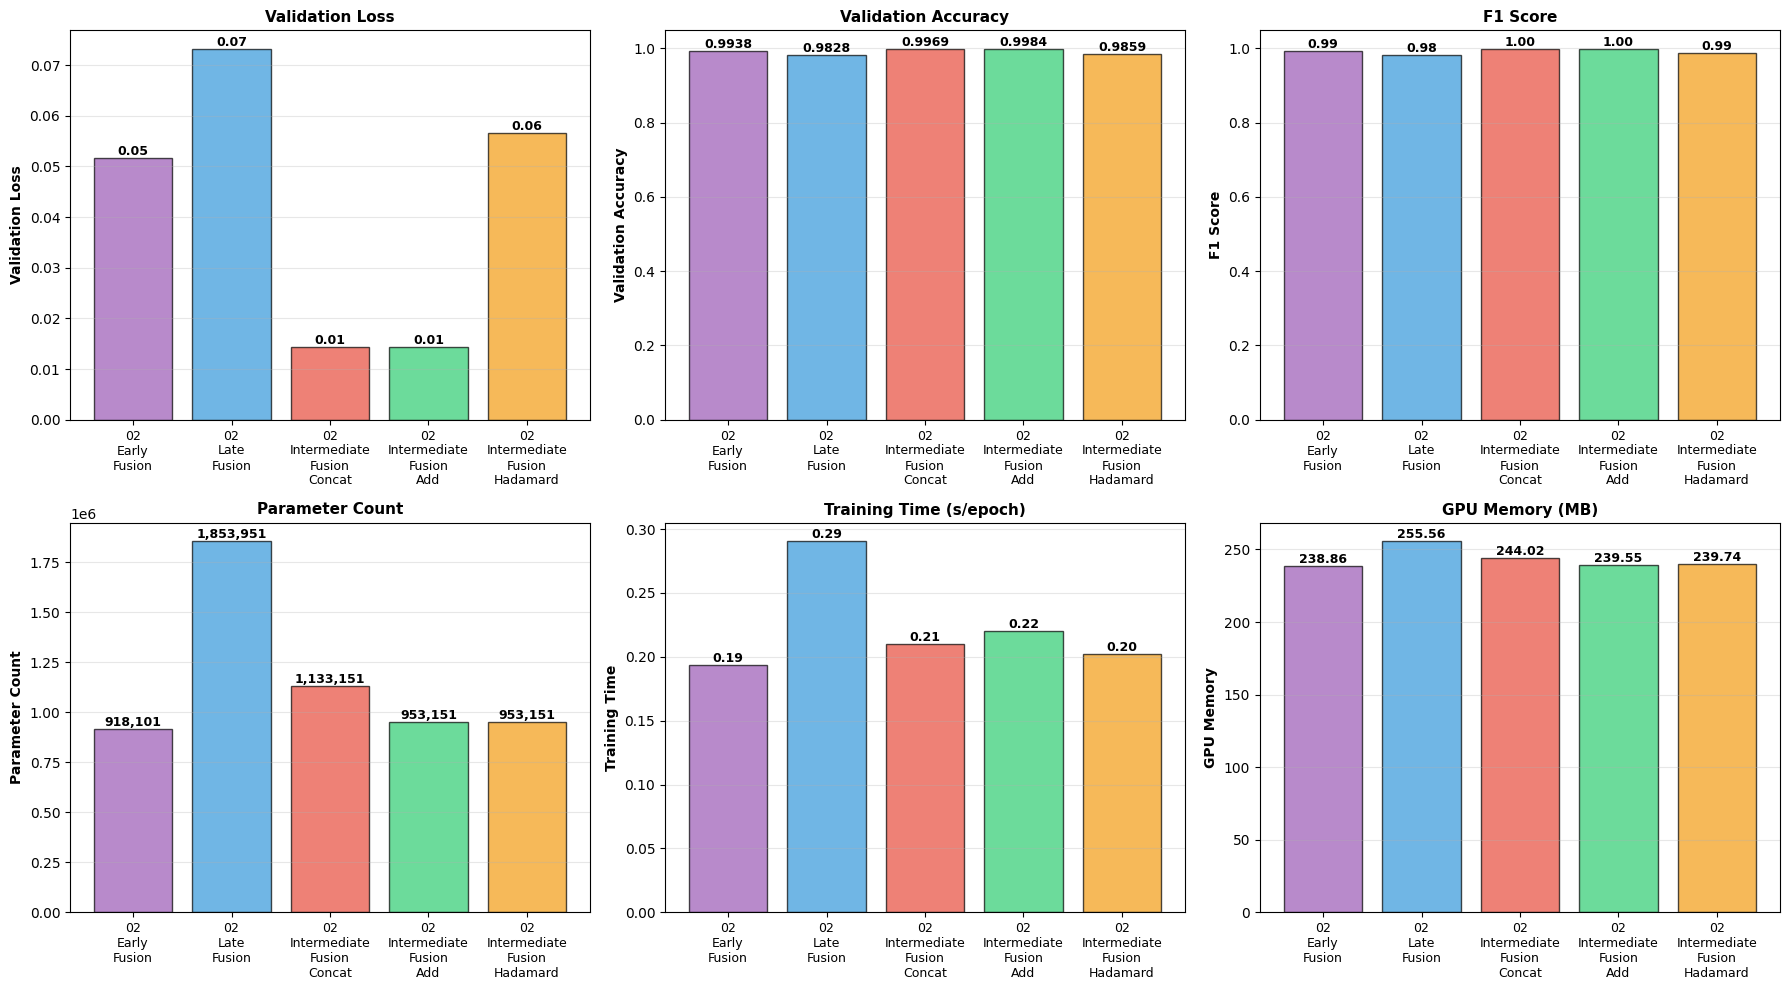

In [10]:
# Visualize comparison metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = [
    ("val_loss", "Validation Loss"),
    ("val_accuracy", "Validation Accuracy"),
    ("val_f1", "F1 Score"),
    ("parameters", "Parameter Count"),
    ("time_per_epoch", "Training Time (s/epoch)"),
    ("memory_mb", "GPU Memory (MB)")
]

model_names = [r["model"].replace("_", "\n") for r in all_results]
colors = ['#9b59b6', '#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric_key, title) in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    values = [r[metric_key] for r in all_results]
    bars = ax.bar(model_names, values, color=colors, alpha=0.7, edgecolor='black')
    
    ax.set_title(f"{title}", fontweight='bold', fontsize=11)
    ax.set_ylabel(title.split('(')[0].strip(), fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=0, labelsize=9)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if metric_key == "parameters":
            label = f"{int(height):,}"
        else:
            label = f"{height:.2f}" if metric_key != "val_accuracy" else f"{height:.4f}"
        ax.text(bar.get_x() + bar.get_width()/2., height,
                label, ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('02_fusion_comparison_fusion_comparison_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# Analysis

The hyperparameter search shows that intermediate Fusion outperforms late and early fusion consistently. While keeping the number of parameters low in comparison to late fusion. Early fusion has the fewest parameters but still higher performance than late fusion and quite similar performance to intermediate fusion with hadamard. The good performance of intermediate fusion suggests that combining features at an intermediate level allows the model to leverage complementary information from both modalities more effectively than simply concatenating features at the end or merging raw inputs at the beginning. In terms of GPU Memory usage and training time all approaches are quite similar, except for late fusion which trains slightly longer, likely due to the increased model complexity. Looking at the different intermediate fusion variante, addition fusion performs best, but quite identically to concatenation. The hadarmard product performs slightly worse, quite similar to early fusion.